<a href="https://colab.research.google.com/github/karinefonseca/machine_learning/blob/main/Competicao_Flai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **8ª Competição de ML FLAI**

In [2]:
#importação dos dados 
import pandas as pd

treino = pd.read_csv('/content/treino.csv', sep = ';', decimal = ',')
teste = pd.read_csv('/content/teste.csv', sep = ';', decimal = ',')

In [3]:
treino.info()
#teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   func_sexo               15000 non-null  object 
 1   func_idade              15000 non-null  int64  
 2   func_racacor            15000 non-null  object 
 3   func_escolaridade       15000 non-null  object 
 4   func_uf                 15000 non-null  object 
 5   func_deficiencia        15000 non-null  object 
 6   empresa_porte           15000 non-null  object 
 7   empresa_setor           15000 non-null  object 
 8   contrato_horastrabalho  15000 non-null  int64  
 9   contrato_salario        15000 non-null  float64
 10  turnover_apos_1_ano     15000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.3+ MB


In [4]:
treino.head()
#teste.head()

,func_sexo,func_idade,func_racacor,func_escolaridade,func_uf,func_deficiencia,empresa_porte,empresa_setor,contrato_horastrabalho,contrato_salario,turnover_apos_1_ano
0,MASCULINO,24,AMARELA-BRANCA,MEDIO COMPLETO,RN,NAO,DE 10 A 19,Serviços,44,1750.65,SIM
1,MASCULINO,24,SEM INFO,MEDIO COMPLETO,BA,NAO,ATE 4,Comércio,44,1002.30,NAO
2,FEMININO,25,PRETA-PARDA,MEDIO COMPLETO,SE,NAO,DE 20 A 49,Comércio,44,1370.14,NAO
3,MASCULINO,54,PRETA-PARDA,MEDIO COMPLETO,PE,NAO,DE 20 A 49,Comércio,44,1854.68,SIM
4,MASCULINO,40,PRETA-PARDA,MEDIO COMPLETO,BA,NAO,DE 20 A 49,Comércio,0,1126.23,NAO


In [5]:
treino.shape
#teste.shape

(15000, 11)

In [6]:
treino['turnover_apos_1_ano'] = treino['turnover_apos_1_ano'].map({'SIM': 1, 'NAO': 0})

In [ ]:
!pip install sweetviz 

                                             |          | [  0%]   00:00 -> (? left)


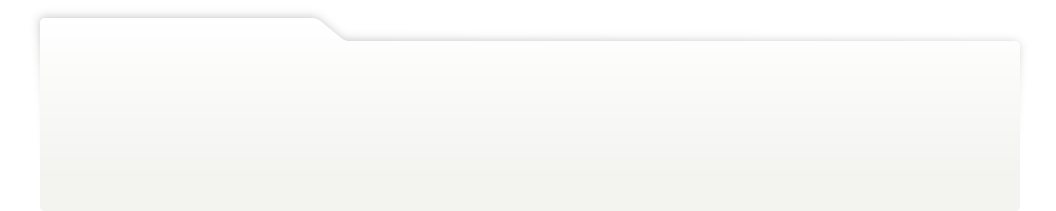
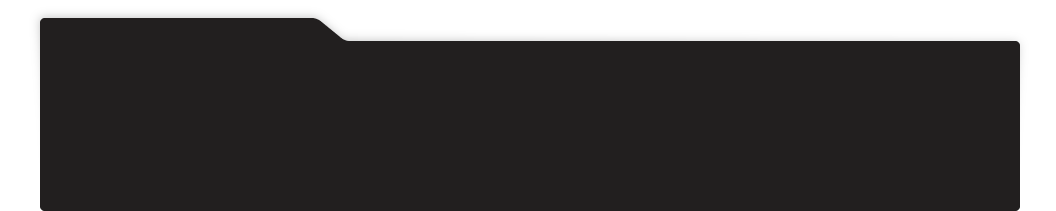
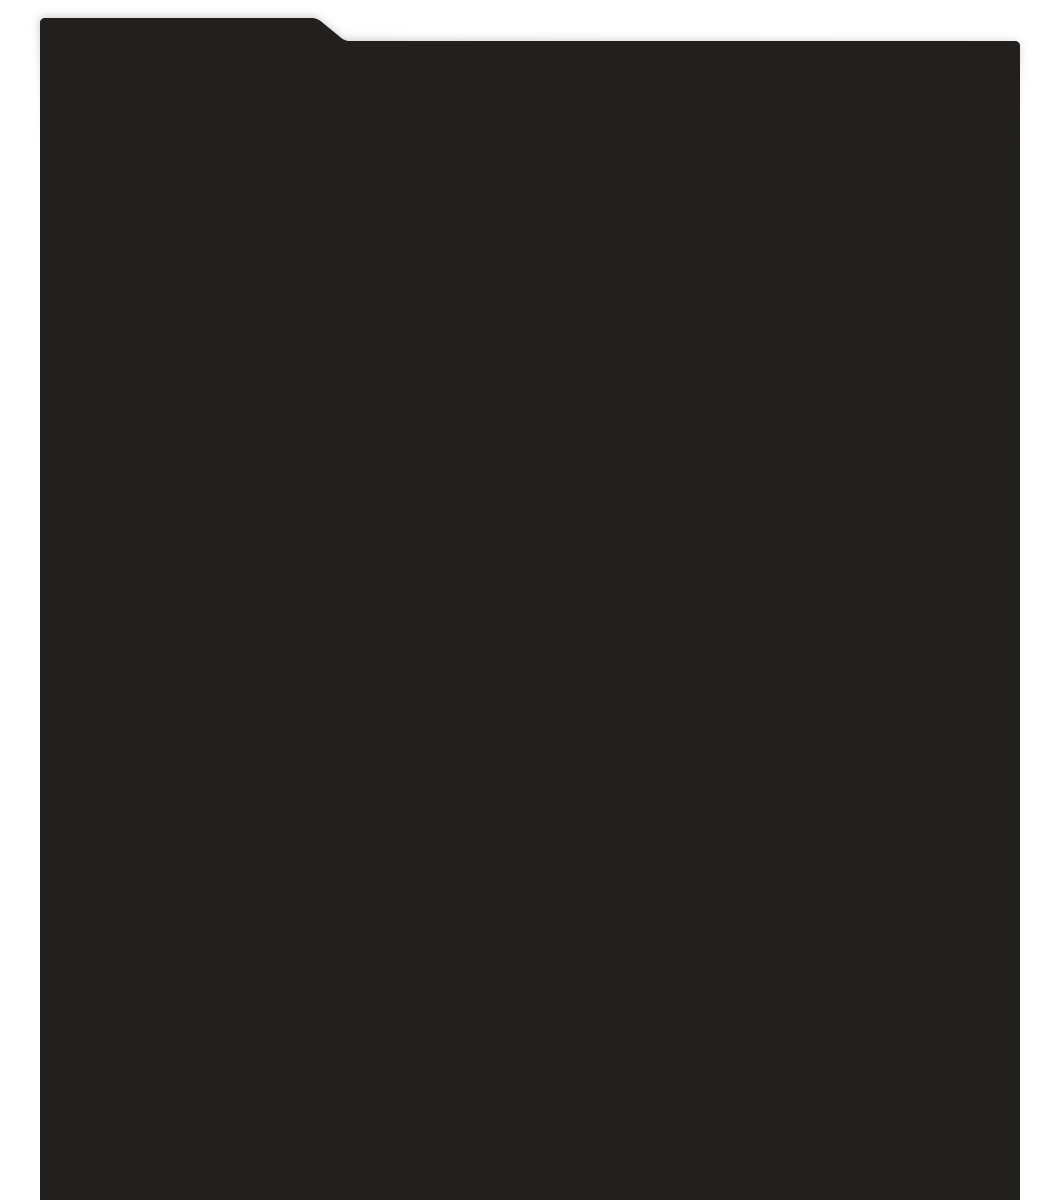
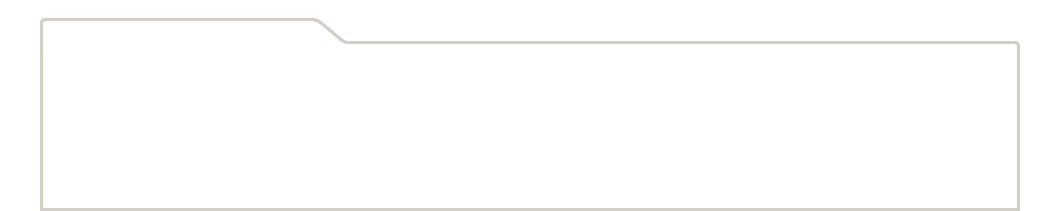
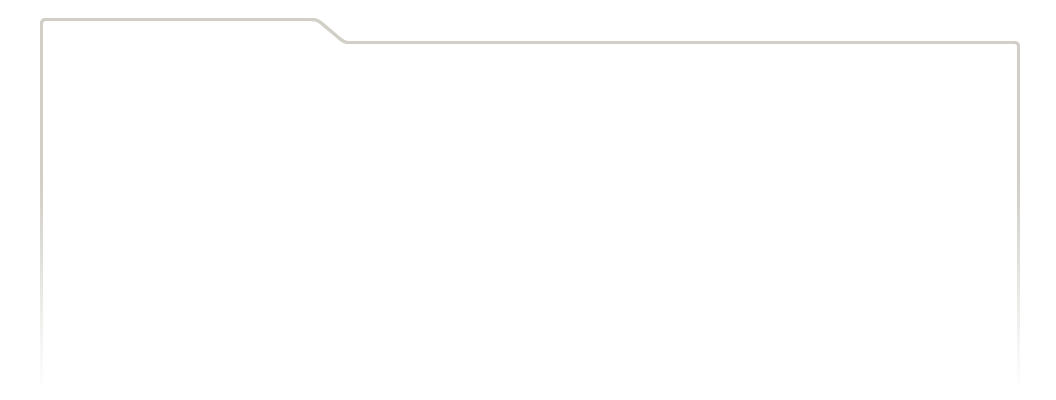
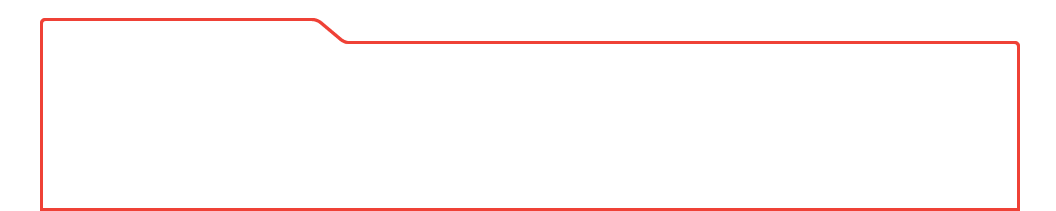
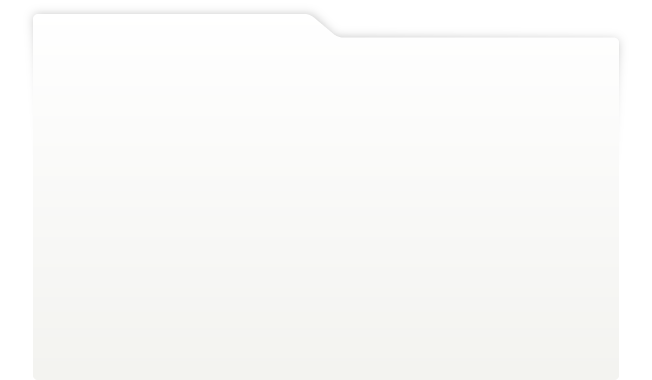
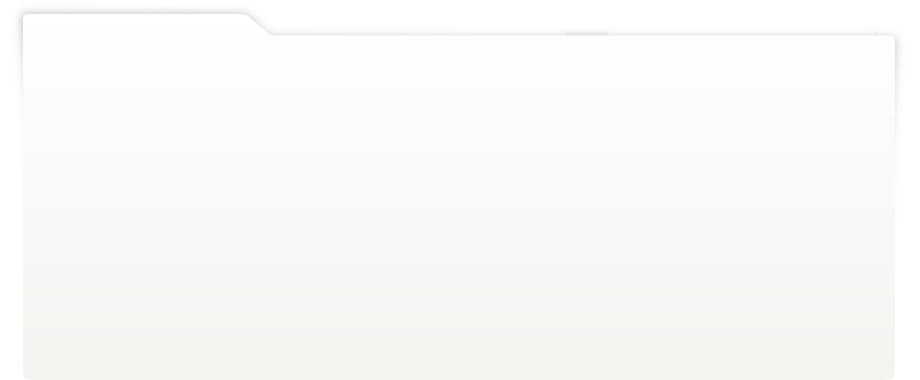
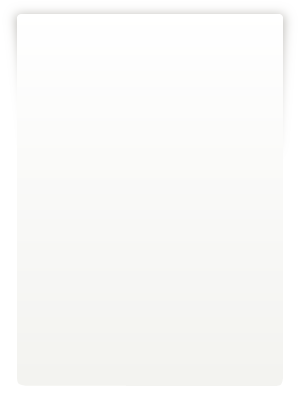
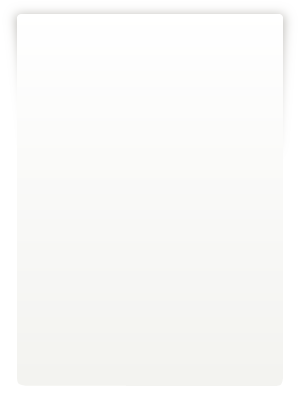
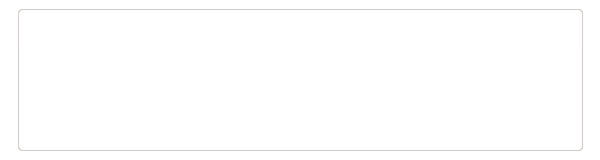
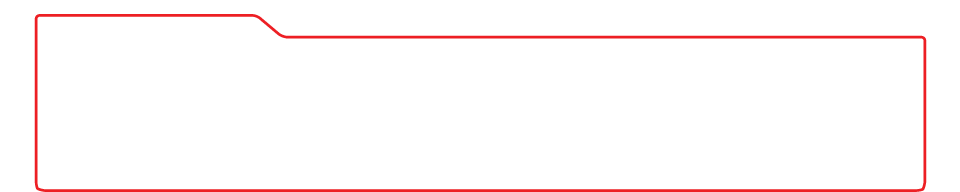
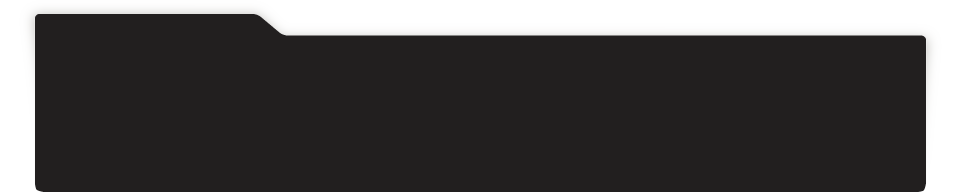
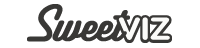
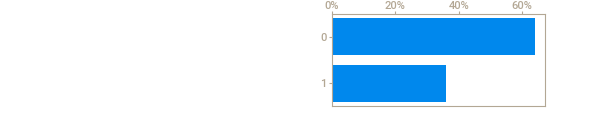
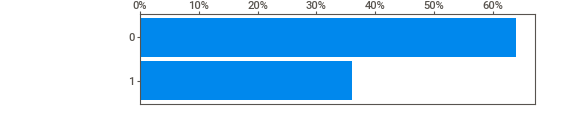
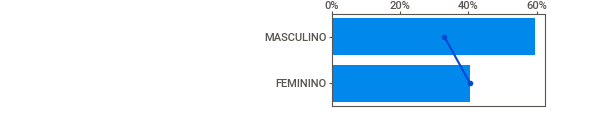
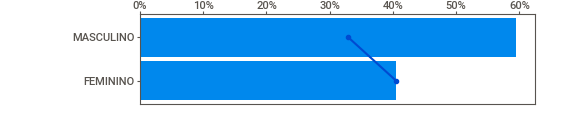
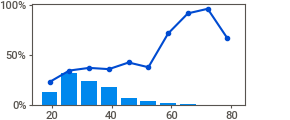
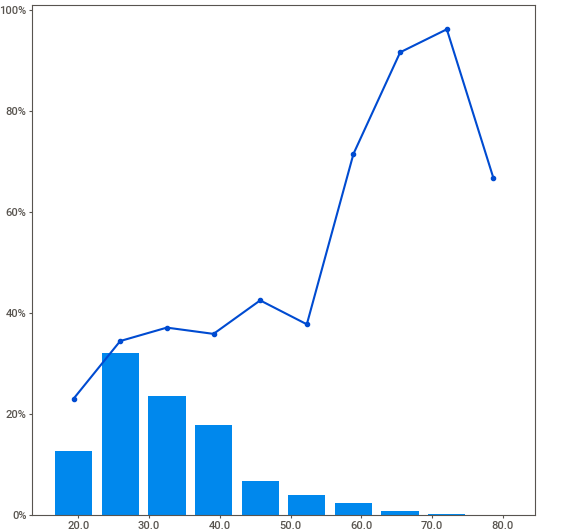
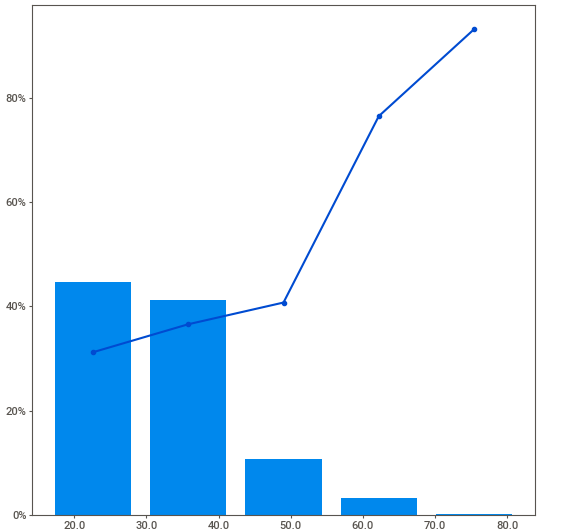
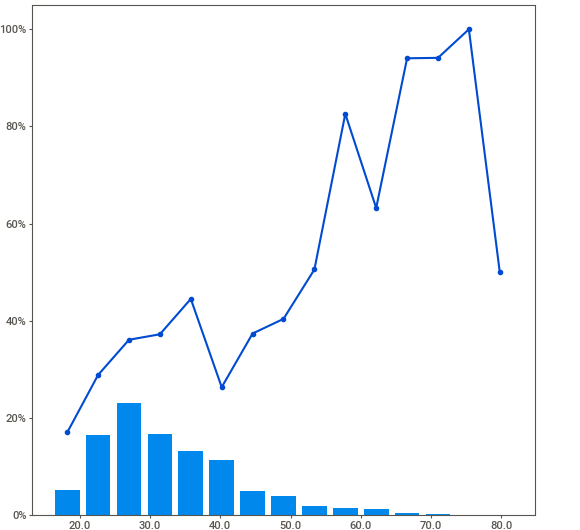
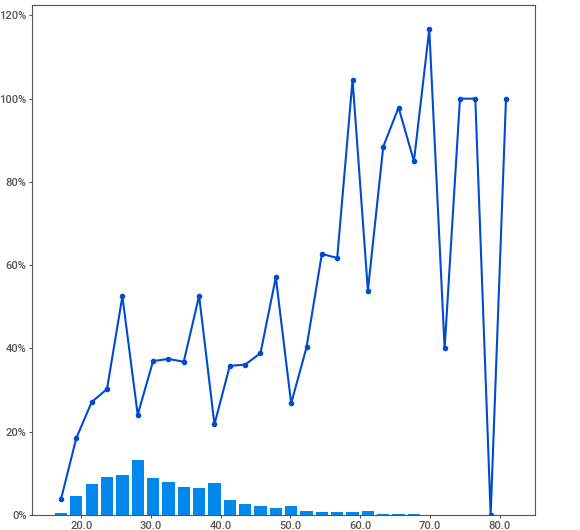
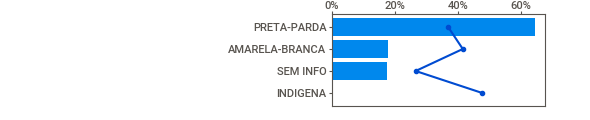
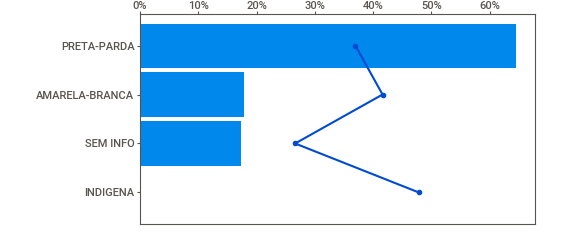
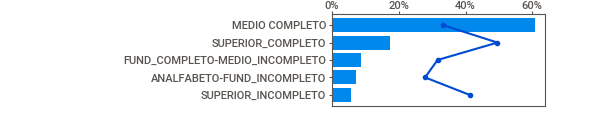
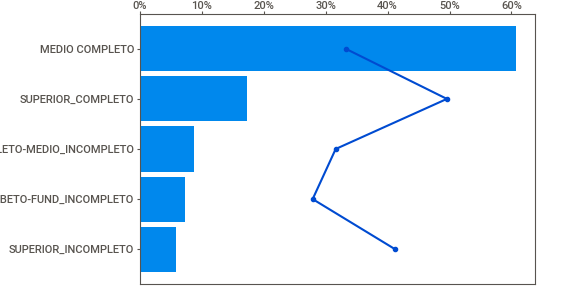
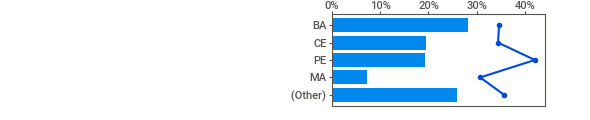
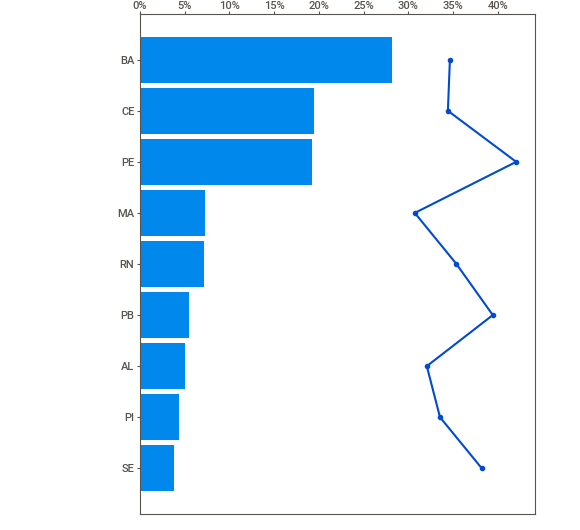
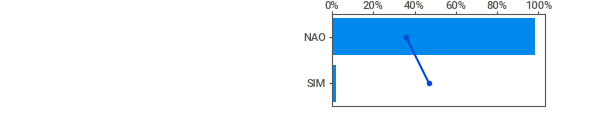
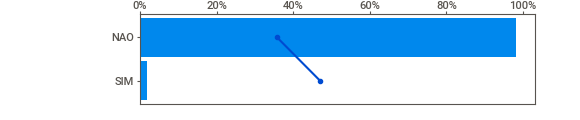
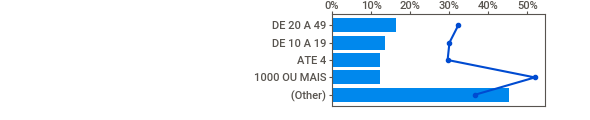
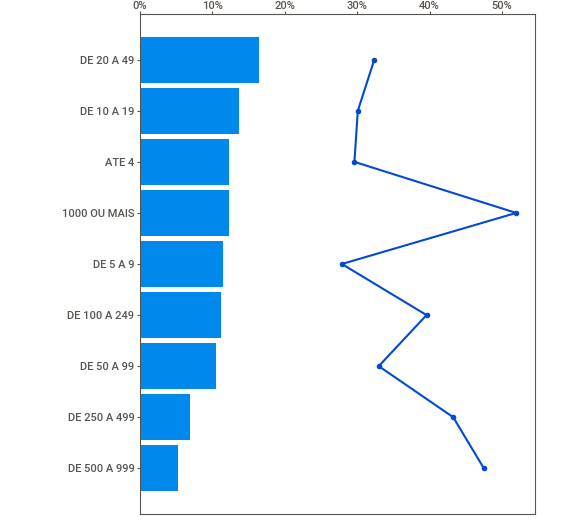
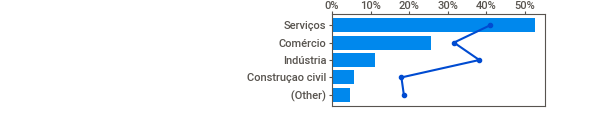
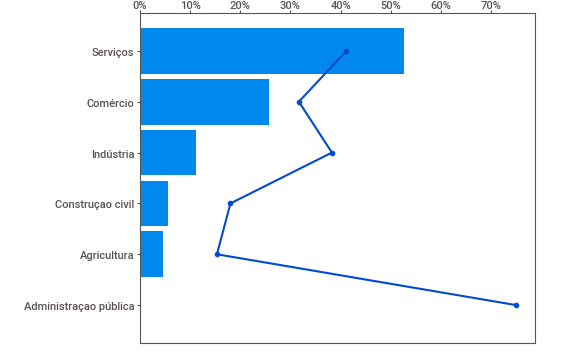
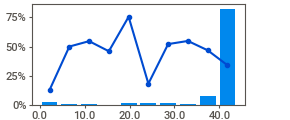
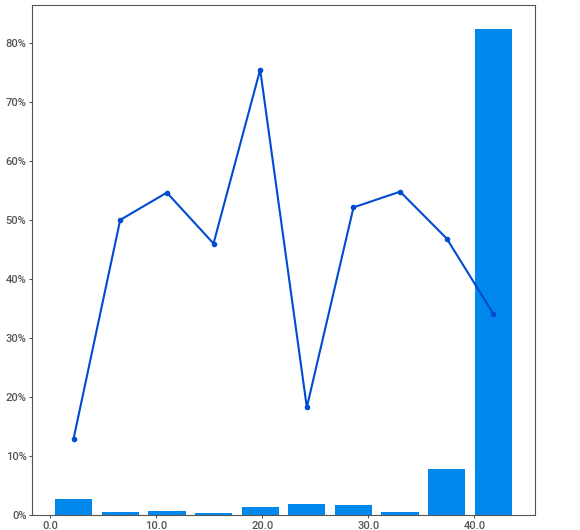
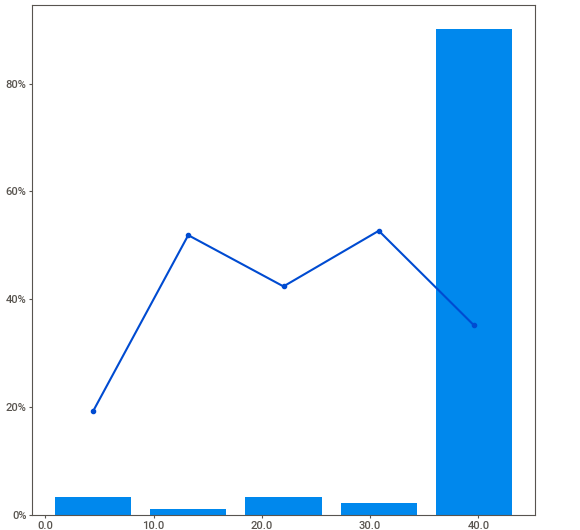
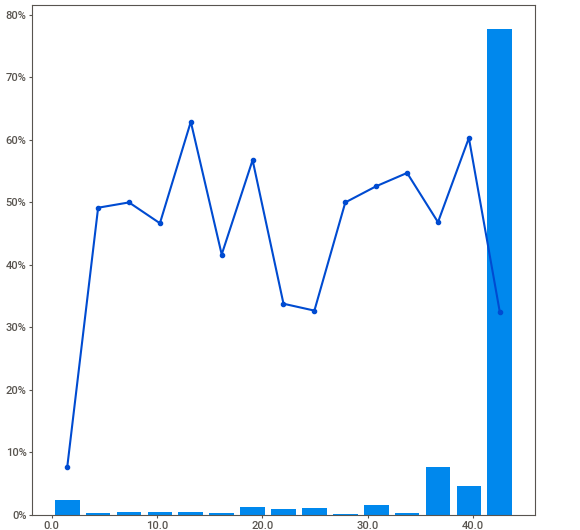
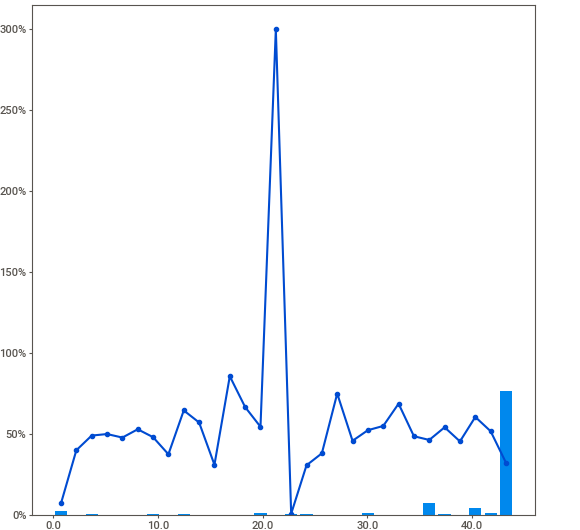
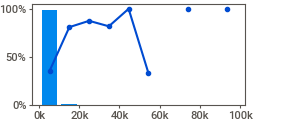
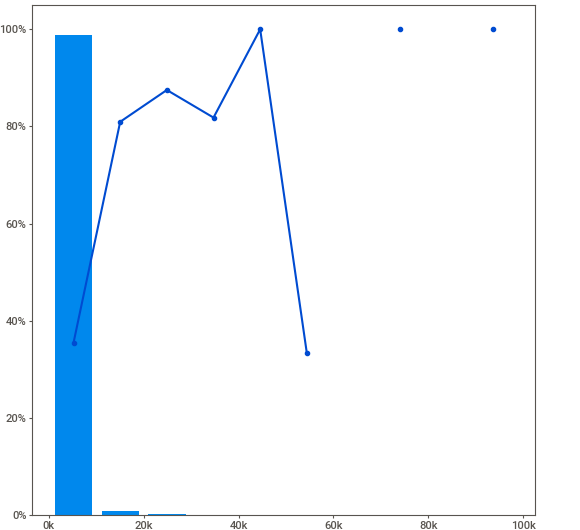
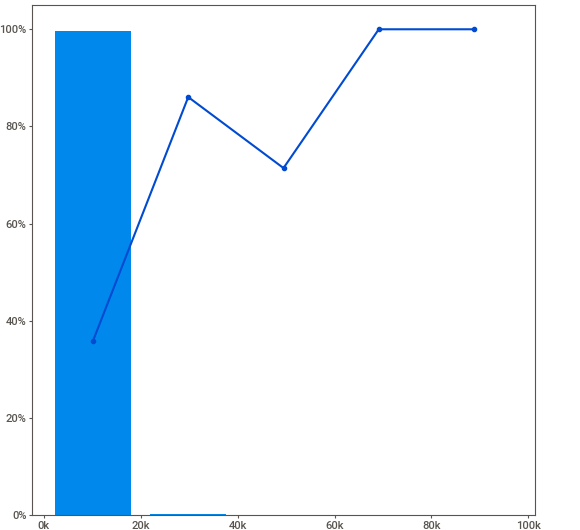
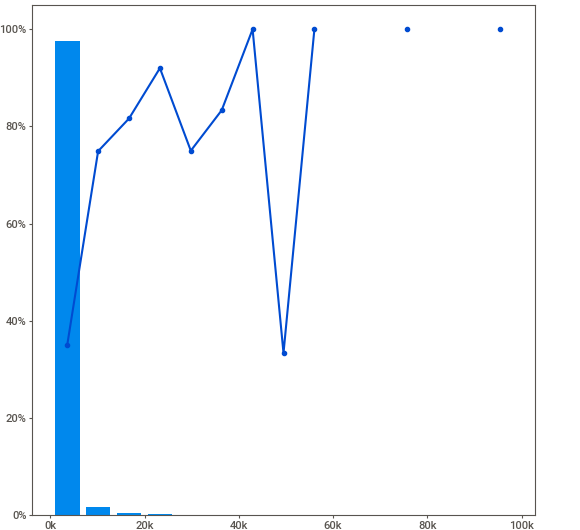
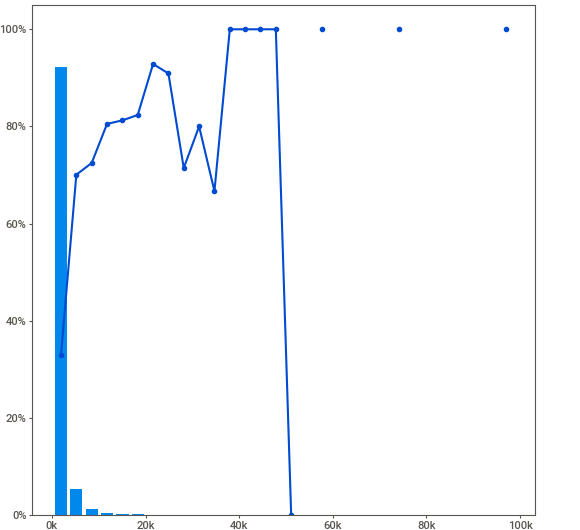
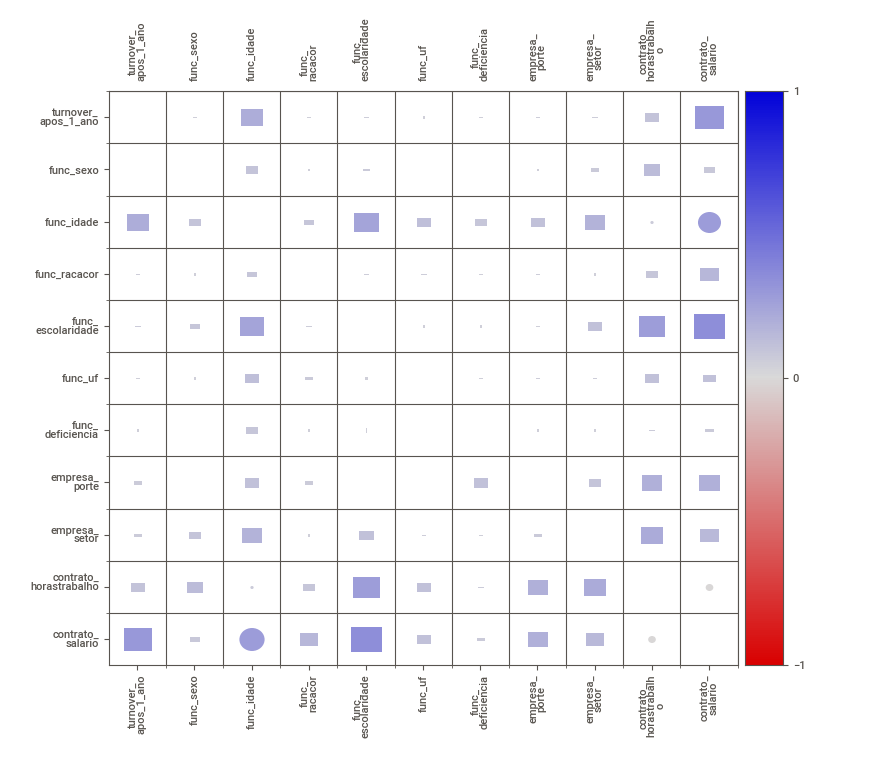
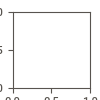

In [8]:
import sweetviz as sv
eda = sv.analyze(source = treino, target_feat = 'turnover_apos_1_ano')
eda.show_notebook()

---

Descarte de variáveis não importantes

In [9]:
treino.drop(["func_racacor", "func_escolaridade", "func_deficiencia","empresa_setor"], axis = 1, inplace = True)

In [10]:
treino.head()

,func_sexo,func_idade,func_uf,empresa_porte,contrato_horastrabalho,contrato_salario,turnover_apos_1_ano
0,MASCULINO,24,RN,DE 10 A 19,44,1750.65,1
1,MASCULINO,24,BA,ATE 4,44,1002.30,0
2,FEMININO,25,SE,DE 20 A 49,44,1370.14,0
3,MASCULINO,54,PE,DE 20 A 49,44,1854.68,1
4,MASCULINO,40,BA,DE 20 A 49,0,1126.23,0


Verificação de Dados Faltantes

In [11]:
treino.isnull().sum()

func_sexo                 0
func_idade                0
func_uf                   0
empresa_porte             0
contrato_horastrabalho    0
contrato_salario          0
turnover_apos_1_ano       0
dtype: int64

Categorização

In [12]:
treino[treino['contrato_horastrabalho']> 0]['contrato_horastrabalho'].describe()

count    14754.000000
mean        41.077403
std          7.586960
min          1.000000
25%         44.000000
50%         44.000000
75%         44.000000
max         44.000000
Name: contrato_horastrabalho, dtype: float64

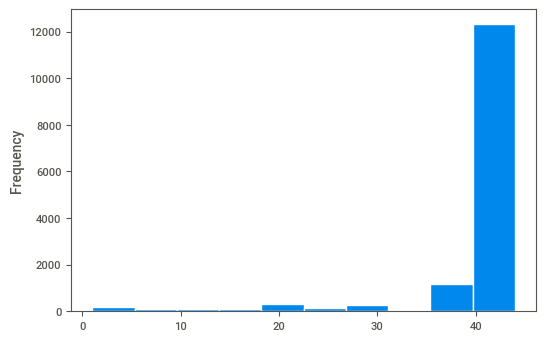

In [13]:
treino[treino['contrato_horastrabalho'] > 0]['contrato_horastrabalho'].plot(kind = 'hist', edgecolor = 'white');

In [14]:
def auxiliar(x):
    if x == 0:
        return 'Zerada'
    elif x < 10:
        return 'Até 10h'
    elif x < 20:
        return '10h - 20h'
    elif x < 30:
        return '20h - 30h'
    elif x < 40:
        return '30h - 40h'
    else:
        return '40h+'

treino['contrato_horastrabalho'] = treino['contrato_horastrabalho'].apply(auxiliar)
treino.head()

,func_sexo,func_idade,func_uf,empresa_porte,contrato_horastrabalho,contrato_salario,turnover_apos_1_ano
0,MASCULINO,24,RN,DE 10 A 19,40h+,1750.65,1
1,MASCULINO,24,BA,ATE 4,40h+,1002.30,0
2,FEMININO,25,SE,DE 20 A 49,40h+,1370.14,0
3,MASCULINO,54,PE,DE 20 A 49,40h+,1854.68,1
4,MASCULINO,40,BA,DE 20 A 49,Zerada,1126.23,0


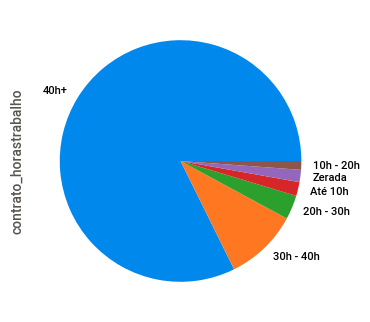

In [15]:
treino['contrato_horastrabalho'].value_counts().plot(kind ='pie');

In [16]:
treino[treino['contrato_salario']> 0]['contrato_salario'].describe()

count    15000.000000
mean      1953.761159
std       2528.049863
min        299.400000
25%       1079.227500
50%       1433.055000
75%       1932.750000
max      98641.650000
Name: contrato_salario, dtype: float64

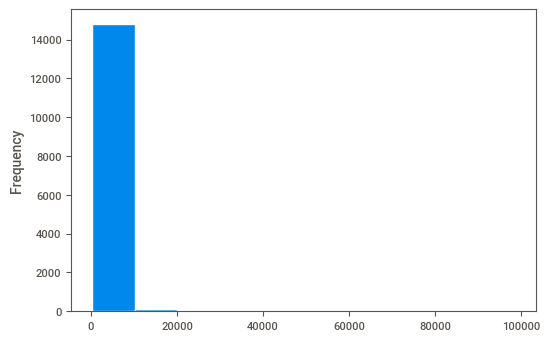

In [17]:
treino[treino['contrato_salario'] > 0]['contrato_salario'].plot(kind = 'hist', edgecolor = 'white');

In [18]:
def auxiliar2(x):
    if x == 0:
        return 'Zerada'
    elif x < 2000:
        return 'Até 2k'
    elif x < 4000:
        return '2k - 4k'
    else:
        return '4k+'

treino['contrato_salario'] = treino['contrato_salario'].apply(auxiliar2)
treino.head()

,func_sexo,func_idade,func_uf,empresa_porte,contrato_horastrabalho,contrato_salario,turnover_apos_1_ano
0,MASCULINO,24,RN,DE 10 A 19,40h+,Até 2k,1
1,MASCULINO,24,BA,ATE 4,40h+,Até 2k,0
2,FEMININO,25,SE,DE 20 A 49,40h+,Até 2k,0
3,MASCULINO,54,PE,DE 20 A 49,40h+,Até 2k,1
4,MASCULINO,40,BA,DE 20 A 49,Zerada,Até 2k,0


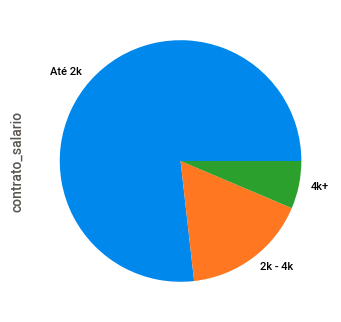

In [19]:
treino['contrato_salario'].value_counts().plot(kind ='pie');

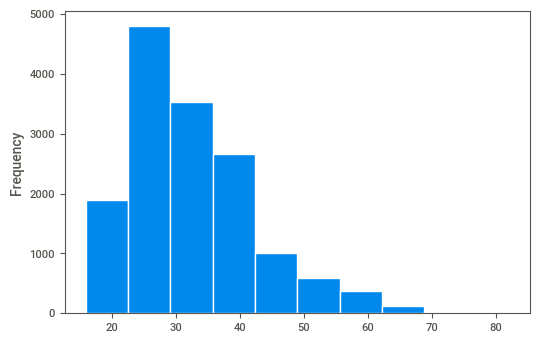

In [20]:
treino[treino['func_idade'] > 0]['func_idade'].plot(kind = 'hist', edgecolor = 'white');

In [21]:
def auxiliar3(x):
    if x == 0:
        return 'Zerada'
    elif x < 20:
        return 'Até 20'
    elif x < 30:
        return '20 - 30'
    elif x < 40:
        return '30 - 40'
    elif x < 50:
        return '40 - 50'
    elif x < 60:
        return '50 - 60'
    else:
        return '60+'

treino['func_idade'] = treino['func_idade'].apply(auxiliar3)
treino.head()

,func_sexo,func_idade,func_uf,empresa_porte,contrato_horastrabalho,contrato_salario,turnover_apos_1_ano
0,MASCULINO,20 - 30,RN,DE 10 A 19,40h+,Até 2k,1
1,MASCULINO,20 - 30,BA,ATE 4,40h+,Até 2k,0
2,FEMININO,20 - 30,SE,DE 20 A 49,40h+,Até 2k,0
3,MASCULINO,50 - 60,PE,DE 20 A 49,40h+,Até 2k,1
4,MASCULINO,40 - 50,BA,DE 20 A 49,Zerada,Até 2k,0


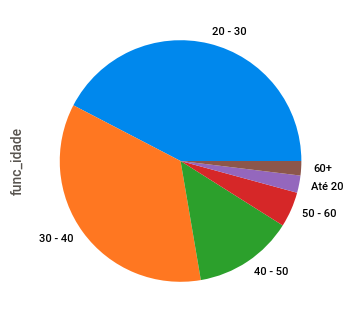

In [22]:
treino['func_idade'].value_counts().plot(kind ='pie');

In [23]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   func_sexo               15000 non-null  object
 1   func_idade              15000 non-null  object
 2   func_uf                 15000 non-null  object
 3   empresa_porte           15000 non-null  object
 4   contrato_horastrabalho  15000 non-null  object
 5   contrato_salario        15000 non-null  object
 6   turnover_apos_1_ano     15000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 820.4+ KB


Dummyficação de Variáveis

In [24]:
variaveis_cat = ['contrato_horastrabalho','contrato_salario', 'func_idade','func_sexo','func_uf','empresa_porte']
treino = pd.get_dummies(treino, columns = variaveis_cat, drop_first= True)

In [25]:
treino.head()

,turnover_apos_1_ano,contrato_horastrabalho_20h - 30h,contrato_horastrabalho_30h - 40h,contrato_horastrabalho_40h+,contrato_horastrabalho_Até 10h,contrato_horastrabalho_Zerada,contrato_salario_4k+,contrato_salario_Até 2k,func_idade_30 - 40,func_idade_40 - 50,...,func_uf_RN,func_uf_SE,empresa_porte_ATE 4,empresa_porte_DE 10 A 19,empresa_porte_DE 100 A 249,empresa_porte_DE 20 A 49,empresa_porte_DE 250 A 499,empresa_porte_DE 5 A 9,empresa_porte_DE 50 A 99,empresa_porte_DE 500 A 999
0,1,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


Escala de Variáveis Contínuas

In [26]:
#treino['contrato_salario'].plot(kind = 'hist', edgecolor = 'white');

In [27]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   turnover_apos_1_ano               15000 non-null  int64
 1   contrato_horastrabalho_20h - 30h  15000 non-null  uint8
 2   contrato_horastrabalho_30h - 40h  15000 non-null  uint8
 3   contrato_horastrabalho_40h+       15000 non-null  uint8
 4   contrato_horastrabalho_Até 10h    15000 non-null  uint8
 5   contrato_horastrabalho_Zerada     15000 non-null  uint8
 6   contrato_salario_4k+              15000 non-null  uint8
 7   contrato_salario_Até 2k           15000 non-null  uint8
 8   func_idade_30 - 40                15000 non-null  uint8
 9   func_idade_40 - 50                15000 non-null  uint8
 10  func_idade_50 - 60                15000 non-null  uint8
 11  func_idade_60+                    15000 non-null  uint8
 12  func_idade_Até 20               

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)


In [30]:
X = treino.drop('turnover_apos_1_ano', axis = 1)
y = treino['turnover_apos_1_ano'] 

In [31]:
lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7)]

nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 100, prof = 5)', 
                        'Random Forest (arvs = 100, prof = 7)']

resultados0 = {}

for i in range(len(lista_de_modelos)):

    print('Rodando modelo: ' + nome_dos_modelos[i])

    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]
    
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)


In [32]:
resultados.sort_values(by = 'f1-score', ascending = False)

,acurácia,sensibilidade,precisão,eficiência,f1-score
Regressão Logística,0.728000,0.471857,0.675102,0.671988,0.555334
Árvore (prof = 3),0.725733,0.451957,0.679093,0.665868,0.542580
Árvore (prof = 7),0.722767,0.455652,0.669930,0.664355,0.541870
Árvore (prof = 5),0.724333,0.452790,0.675195,0.664956,0.541772
"Random Forest (arvs = 100, prof = 7)",0.726200,0.447508,0.682725,0.665259,0.540271
"Random Forest (arvs = 50, prof = 7)",0.723700,0.436858,0.682905,0.660974,0.531727
Bagging,0.705833,0.447044,0.629004,0.649244,0.522261
"Random Forest (arvs = 100, prof = 5)",0.723067,0.418625,0.691915,0.656494,0.521002
"Random Forest (arvs = 50, prof = 5)",0.720833,0.411223,0.690645,0.653131,0.512239
5-NN,0.674300,0.429826,0.563666,0.620842,0.487353


In [33]:
modelo = LogisticRegression()
modelo.fit(X,y)

LogisticRegression()

In [37]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   func_sexo               15000 non-null  object 
 1   func_idade              15000 non-null  int64  
 2   func_racacor            15000 non-null  object 
 3   func_escolaridade       15000 non-null  object 
 4   func_uf                 15000 non-null  object 
 5   func_deficiencia        15000 non-null  object 
 6   empresa_porte           15000 non-null  object 
 7   empresa_setor           15000 non-null  object 
 8   contrato_horastrabalho  15000 non-null  int64  
 9   contrato_salario        15000 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 1.1+ MB


In [ ]:
pred = modelo.predict(teste[['func_idade']])

In [ ]:
pred

In [ ]:
list(pred).count('NAO')

In [ ]:
subm = pd.DataFrame()
subm['turnover_apos_1_ano'] = pred

In [ ]:
subm

In [ ]:
subm.to_csv('submissão.csv', index = False)

---